# 💻 Raster

<div class="alert alert-info">

**Ekstra biblioteker**

Senere i denne notebooken skal vi bruke bibliotekene `xarray` og `rioxarray`, det kan være en god ide å installere de allerede nå, så det er klart til bruk senere:

`conda install -c conda-forge xarray rioxarray`

</div>

Rasterdata er mye brukt til å representere og lagre data om kontinuerlige overflater, der hver piksel inneholder spesifikk informasjon (karakteristikk, utstråling, spektralsignaturer) om et spesifikt område av jorden, for eksempel et 10x10 meter område. Denne notebooken gir en introduksjon til behandling av rasterdata i Python, og er basert på [kapittel 7 i Python for Geographic Data Analysis](https://pythongis.org/part2/chapter-07/index.html) 

Det er forskjellige grunner til at du kanskje vil lagre dataene dine i rasterformat:

- Det er en enkel datastruktur: En matrise av celler med verdier som representerer informasjon om den observerte overflaten/fenomenene
- Det er en effektiv måte å lagre data fra store sammenhengende flater
- Det er et kraftig format som kan brukes til ulike romlige og statistiske analyser
- Du kan utføre raske overlay med flere lag

## Arbeide med rasterdata i Python

Det er en rekke biblioteker som er mye brukt når du arbeider med rasterdata i Python:

- `xarray` gir en brukervennlig og intuitiv måte å jobbe med flerdimensjonale rasterdata med koordinater og attributter (noe lik `geopandas` som brukes til vektordatabehandling),
- `rioxarray` gir metoder for å utføre GIS-relaterte operasjoner med rasterdata (f.eks. lesing/skriving, reprojisering, klipping, resampling),
- "xarray-spatial" gir metoder for å analysere rasterdata (f.eks. fokale/sonale operasjoner, overflateanalyse, banefinning),
- `rasterio` kjernebibliotek for arbeid med GIS-rasterdata. `rioxarray` er en utvidelse av dette biblioteket som bringer de samme funksjonalitetene på toppen av `xarray`-biblioteket,
- `numpy` er et kjerne-bibliotek i Python for numerisk databehandling som brukes til å representere og arbeide med flerdimensjonale arrays. `numpy` har stor innflytelse på hvordan de andre rasterbibliotekene fungerer og kan brukes til å generere flerdimensjonale arrays fra bunnen av.
- 
## Lage et enkelt rasterlag ved å bruke `numpy`

For å få en bedre følelse av hvordan rasterdataene ser ut, kan vi starte med å lage en enkel todimensjonal array i Python ved å bruke `numpy`. I det følgende vil vi modifisere rasterlaget til å representere et enkelt terreng som har en høyde midt i rutenettet. Vi gjør dette ved å sette høyere verdier i midten mens de andre verdiene er representert med verdi 0. La oss starte med å importere `numpy` og `matplotlib`-biblioteket som vi bruker for å visualisere dataene våre:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Å lage et enkelt 2D-rasterlag (en 2D-matrise) med 10x10-matrise kan enkelt gjøres ved å bruke en `numpy`-metode `.zeros()` med fyller cellene (piksler) med nuller. Hver null representerer en standard pikselverdi (f.eks. 0 høyde). Du kan tenke på dette som et tomt rasternett:

In [2]:
raster_lag = np.zeros((10, 10))
raster_lag

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Nå har vi en enkel 2D-matrise fylt med nuller. Deretter modifiserer vi rasterlaget for å representere et enkelt terreng og legger til større tall i midten av rutenettet ved å sette høyere verdier i midten. Vi kan gjøre dette ved å *{term}`slice`* numpy-matrisen ved å bruke indeksene til matrisen og oppdatere tallene på disse stedene til å være høyere. Å skjære "numpy"-matriser skjer på lignende måte som når du arbeider med Python-lister og får tilgang til elementene i en liste (se kapittel 2.2). Men i dette tilfellet gjør vi dette i to dimensjoner ved å få tilgang til verdiene som er lagret i spesifikke rader og kolonner ved å følge syntaksen: `[start-rad-idx: end-row-idx, start-col-idx: end-col- idx]`. Dermed kan vi oppdatere verdiene i vår 2D-matrise som følger:

In [3]:
raster_lag[4:7, 4:7] = 5
raster_lag[5, 5] = 10
raster_lag

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5.,  5.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5., 10.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5.,  5.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Her oppdaterte vi først cellene mellom den fjerde og syvende raden og kolonnen (`[4:7, 4:7]`) til å ha en verdi `5`, og deretter oppdaterte vi midten av matrisen til å representere toppen av bakken med verdien `10`. Som en Resultatet har vi et enkelt rasterlag som simulerer et enkelt terreng. Vi kan også plotte dette rasterlaget ved å bruke `matplotlib`-biblioteket og dets `.imshow()`-funksjon som kan brukes til å visualisere arrays:

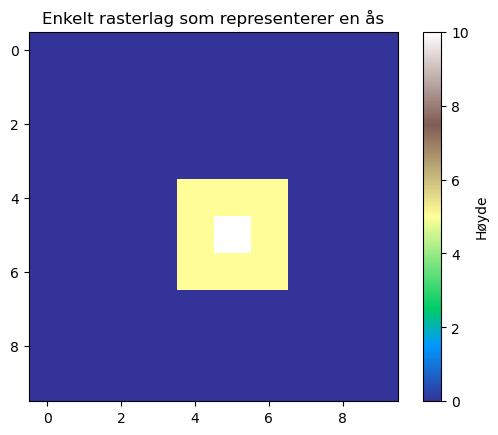

In [4]:
plt.imshow(raster_lag, cmap='terrain')
plt.colorbar(label='Høyde')
plt.title('Enkelt rasterlag som representerer en ås')
plt.show()

# Introduksjon til datastrukturer i xarray

Nå som du har lært litt grunnleggende om rasterdata og hvordan du lager en enkel 2-dimensjonal raster-array ved å bruke "numpy", fortsetter vi å utforske på en mer omfattende måte hvordan du arbeider med virkelige rasterdata ved å bruke "xarray" og `rioxarray`-biblioteker (+ andre relevante biblioteker knyttet til dem). `xarray`-biblioteket er et svært nyttig verktøy for å lagre, representere og manipulere rasterdata, mens `rioxarray` gir forskjellige rasterbehandlingsfunksjoner (GIS) på toppen av `xarray`-datastrukturene, for eksempel lesing og skriving av flere forskjellige rasterformater og utføre ulike geoberegningsoppgaver. Under panseret bruker `rioxarray` et annet Python-bibliotek kalt `rasterio` (som fungerer med N-dimensjonale `numpy`-matriser), men fordelen med `xarray` og `rioxarray` er at de gir en enklere og mer intuitiv måte å jobbe med rasterdatalag, på en litt lignende måte som å jobbe med vektordata ved å bruke `geopandas`.

Når du arbeider med rasterdata har du vanligvis ulike lag som representerer ulike geografiske trekk ved verden (f.eks. høyde, temperatur, nedbør osv.), og disse dataene blir muligens fanget opp på ulike tider av året/dagen/timen, noe som betyr at du har longitudinelle observasjoner fra samme område, som utgjør tidsseriedata. Oftere enn ikke må du kombinere informasjon fra disse lagene for å kunne gjennomføre meningsfulle analyser basert på dataene, for eksempel å lage en værmelding. En av de største fordelene med "xarray" er at du enkelt kan lagre, kombinere og analysere alle disse forskjellige lagene via et enkelt objekt, det vil si et "Dataset", som vist i figur 7.2.

De to grunnleggende datastrukturene som tilbys av 'xarray'-biblioteket er 'DataArray' og 'Dataset' (Figur 7.2). Begge bygger på og utvider styrkene til bibliotekene "numpy" og "pandas". 'DataArray' er en merket N-dimensjonal array som ligner på 'pandas.Series' men fungerer med rasterdata (lagret som 'numpy' arrays). "Datasettet" er igjen en flerdimensjonal array-database i minnet som inneholder flere "DataArray"-objekter. I tillegg til variablene som inneholder observasjonene av et gitt fenomen, har du også `x`- og `y`-koordinatene til observasjonene lagret i separate lag, samt metadata som gir relevant informasjon om dataene dine, for eksempel Koordinatreferansesystem og /eller tid. Dermed er et "datasett" som inneholder rasterdata veldig likt "geopandas.GeoDataFrame", og faktisk kan forskjellige "xarray"-operasjoner føles veldig kjent hvis du har lært det grunnleggende om "pandas" og "geopandas" dekket i kapittel 3 og 6.


![***Figure 7.2.** Key `xarray` data structures. Image source: Xarray Community (2024), lisensiert under Apache 2.0.*](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

***Figur 7.2** Nøkkel "xarray" datastrukturer. Bildekilde: [Xarray Community](https://tutorial.xarray.dev/fundamentals/01_data_structures.html) (2024), lisensiert under Apache 2.0.*

Noen av fordelene med "xarray" inkluderer:

- Et mer intuitivt og brukervennlig grensesnitt for å jobbe med flerdimensjonale arrays (sammenlignet f.eks. med "numpy")
- Muligheten til å velge og kombinere data langs en dimensjon på tvers av alle arrays i et "Datasett" samtidig
- Kompatibilitet med et stort økosystem av Python-biblioteker som fungerer med arrays/rasterdata
- Tett integrering av funksjonaliteter fra velkjente Python-dataanalysebiblioteker, som "pandas", "numpy", "matplotlib" og "dask".

## Lese inn en fil

Vi skal nå bruke `xarray` og `rioaxarray` til å lese inn rasterfilen vår. `xarray` og `rioaxarray` er ikke en del av oppsettet vi satte opp i `conda`-miljøet i starten av kurset. Hvis du ikke har installert det på egenhånd, kan det derfor være nødvendig å kjøre `conda install -c conda-forge xarray rioxarray` for å sørge for at den neste delen av notebooken fungerer.


In [5]:
import xarray as xr
import rasterio
from osgeo import gdal
import pathlib
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_MAPPE = NOTEBOOK_PATH / "data"

import rioxarray

url = DATA_MAPPE/"Aas_20240625.tif"
data = xr.open_dataset(url, engine='rasterio')
data

<xarray.Dataset> Size: 54MB
Dimensions:      (band: 4, x: 2439, y: 1378)
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 20kB 5.911e+05 5.911e+05 ... 6.155e+05 6.155e+05
  * y            (y) float64 11kB 6.63e+06 6.63e+06 ... 6.616e+06 6.616e+06
    spatial_ref  int64 8B ...
Data variables:
    band_data    (band, y, x) float32 54MB ...

Nå har vi lest GeoTIFF-filen inn i en `xarray.Dataset` datastruktur som vi lagret i en variabel `data`. "Datasettet" inneholder de faktiske dataverdiene for rastercellene, samt annen relevant attributtinformasjon relatert til dataene

In [6]:
type(data)

xarray.core.dataset.Dataset

In [7]:
# Koordinatene i datasettet
data.coords

Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 20kB 5.911e+05 5.911e+05 ... 6.155e+05 6.155e+05
  * y            (y) float64 11kB 6.63e+06 6.63e+06 ... 6.616e+06 6.616e+06
    spatial_ref  int64 8B ...

In [8]:
# Projeksjonen til datasettet
data.rio.crs

CRS.from_epsg(32632)

In [9]:
# Variabler i datasettet
data.variables

Frozen({'band': <xarray.IndexVariable 'band' (band: 4)> Size: 32B
array([1, 2, 3, 4]), 'x': <xarray.IndexVariable 'x' (x: 2439)> Size: 20kB
array([591106.414369, 591116.413908, 591126.413447, ..., 615465.290753,
       615475.290292, 615485.289831]), 'y': <xarray.IndexVariable 'y' (y: 1378)> Size: 11kB
array([6630014.779816, 6630004.777248, 6629994.774681, ..., 6616261.249119,
       6616251.246552, 6616241.243984]), 'spatial_ref': <xarray.Variable ()> Size: 8B
[1 values with dtype=int64]
Attributes: (12/18)
    crs_wkt:                           PROJCS["WGS 84 / UTM zone 32N",GEOGCS[...
    semi_major_axis:                   6378137.0
    semi_minor_axis:                   6356752.314245179
    inverse_flattening:                298.257223563
    reference_ellipsoid_name:          WGS 84
    longitude_of_prime_meridian:       0.0
    ...                                ...
    longitude_of_central_meridian:     9.0
    false_easting:                     500000.0
    false_northing:    

In [10]:
# Hvor mange og hvilke bånd
data.band.shape, data.band

((4,),
 <xarray.DataArray 'band' (band: 4)> Size: 32B
 array([1, 2, 3, 4])
 Coordinates:
   * band         (band) int64 32B 1 2 3 4
     spatial_ref  int64 8B ...)

### NDVI

En vanlig operasjon er å beregne `NDVI` (Normalized difference vegetation index), noe som ganske enkelt lar seg gjøre:

In [11]:
NiR=data['band_data'][3,:,:]#Band 4 as counting starts from 0
Red=data['band_data'][2,:,:]#Band 3 as counting starts from 0
NDVI=(NiR-Red)/(NiR+Red)

In [12]:
NDVI

<xarray.DataArray 'band_data' (y: 1378, x: 2439)> Size: 13MB
array([[ 0.22876385,  0.22518766,  0.2872807 , ...,  0.19426751,
         0.13308458,  0.10995542],
       [ 0.20654206,  0.15864167,  0.21527778, ...,  0.22999737,
         0.16201475,  0.09984276],
       [ 0.22785808,  0.10348361,  0.1479719 , ...,  0.19976532,
         0.07152034,  0.0209607 ],
       ...,
       [-0.01456311, -0.02172164, -0.0016129 , ...,  0.542042  ,
         0.44917086,  0.5226367 ],
       [-0.01139138, -0.01818182, -0.001222  , ...,  0.5350183 ,
         0.47758776,  0.4849965 ],
       [-0.0070922 , -0.01260675, -0.01442308, ...,  0.5019272 ,
         0.49319124,  0.44478807]], dtype=float32)
Coordinates:
  * x            (x) float64 20kB 5.911e+05 5.911e+05 ... 6.155e+05 6.155e+05
  * y            (y) float64 11kB 6.63e+06 6.63e+06 ... 6.616e+06 6.616e+06
    spatial_ref  int64 8B 0

In [13]:
print('The variable type of the data:',type(NDVI))
print('The size of the data (first band):', NDVI.shape)
print('Minimum:', NDVI.min())
print('Maximum:', NDVI.max())
print('Mean:', NDVI.mean())
print('STD:', NDVI.std())
print('Data type of the array:',NDVI.dtype)

The variable type of the data: <class 'xarray.core.dataarray.DataArray'>
The size of the data (first band): (1378, 2439)
Minimum: <xarray.DataArray 'band_data' ()> Size: 4B
array(-0.43764818, dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0
Maximum: <xarray.DataArray 'band_data' ()> Size: 4B
array(0.7736798, dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0
Mean: <xarray.DataArray 'band_data' ()> Size: 4B
array(0.46235642, dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0
STD: <xarray.DataArray 'band_data' ()> Size: 4B
array(0.15261656, dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0
Data type of the array: float32


Vi kan også plotte NDVI-utregningen med `plt.imshow()`

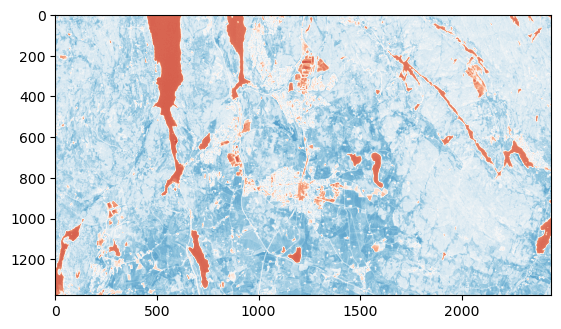

In [14]:
plt.imshow(NDVI,vmin=-0.3, vmax=1,cmap='RdBu')

## Videre lesning

Hvis du ønsker å lese mer om å jobbe med rasterdata i Python anbefaler jeg å ta en titt på:

- [Raster operasjoner i `Python for Geographic Data Analysis`](https://pythongis.org/part2/chapter-07/nb/02-common-raster-operations.html)
- [Kapittel 11, 12 og 13 i `Introduction to GIS Programming`](https://geog-312.gishub.org/book/geospatial/rasterio.html)